<a href="https://colab.research.google.com/github/RA2112704010029/Forest-Fire-predictions/blob/main/LSTM_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA USED IN THIS PROJECT: https://raw.githubusercontent.com/hamaadshah/hackathon_june_2018/master/jena_climate_2009_2016.csv


GOOGLE COLAB NOTEBOOK: https://colab.research.google.com/drive/1b3CUJuDOmPmNdZFH3LQDmt5F0K3FZhqD?usp=sharing#scrollTo=Vsy2-BjnWMhB


YOUTUBE CHANNEL: https://colab.research.google.com/drive/1b3CUJuDOmPmNdZFH3LQDmt5F0K3FZhqD?
usp=sharing#scrollTo=Vsy2-BjnWMhB

COURSES FOR DSA :


In [ ]:
# Importing all the required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import os

In [ ]:
# Reading the file
time = pd.read_csv("https://raw.githubusercontent.com/hamaadshah/hackathon_june_2018/master/jena_climate_2009_2016.csv")
time

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [ ]:
# Getting only a few rows of the dataset; starts from 5 and every 6th row is taken
time[5::6]
time

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [ ]:
# Setting the index - equating the index to 'DATE TIME' column; first 26 rows
time.index = pd.to_datetime(time['Date Time'], format='%d.%m.%Y  %H:%M:%S')
time[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 01:10:00,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 01:20:00,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
2009-01-01 01:30:00,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5


<Axes: xlabel='Date Time'>

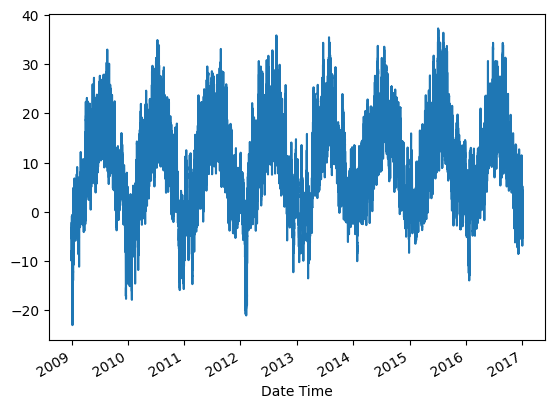

In [ ]:
# Plotting the temperature and 'DATE TIME'
temp = time['T (degC)']
temp.plot()

In [ ]:
# Predicting the temperature for every hour after every 5 hours
# EXAMPLE: [1, 2, 3, 4, 5] [6- Predicting the temp] and then bump the hours by one and predicting the temp at 7 th hour and continuing this
# window_size - taking the last 5 measurements but we donot want our code to be fixed hence we are updating it

def time_to_X_y(time, window_size=5):
  time_as_np = time.to_numpy() # converting the dataframe to numpy
  X = [] # adding the five hour values
  y = [] # the next hour value (predicting value for that hour)
  for i in range(len(time_as_np)-window_size):
    row = [[a] for a in time_as_np[i:i+window_size]]
    X.append(row)
    label = time_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
# Calling the function
WINDOW_SIZE = 5
X, y = time_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((420546, 5, 1), (420546,))

In [ ]:
# Splitting the data into train, test and validation sets
X_train, y_train = X[:355546], y[:355546]
X_val, y_val = X[355546:360546], y[355546:360546]
X_test, y_test = X[360546:], y[360546:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((355546, 5, 1), (355546,), (5000, 5, 1), (5000,), (60000, 5, 1), (60000,))

In [ ]:
# Reshape X_train and X_val
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)


In [ ]:
import tensorflow as tf
import pandas as pd

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(5, 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["RootMeanSquaredError"])

# Reshape X_train and X_val
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

# Fit the model
model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=0)

In [ ]:
# Creating 3 pndas dataframe for traing, testing and validation dataset
# 1. TRAING DATASET
train_predictions = model_1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actual':y_train})
train_results

11111/11111 [==============================] - 25s 2ms/step


,Train Predictions,Actual
0,-8.294153,-8.05
1,-7.891522,-7.62
2,-7.373858,-7.62
3,-7.627851,-7.91
4,-7.978792,-8.43
...,...,...
355541,17.447945,17.03
355542,17.088327,17.14
355543,17.237906,17.17
355544,17.125610,17.42


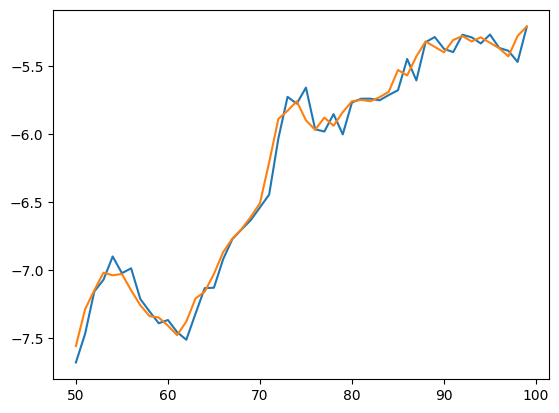

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actual'][50:100])

In [ ]:
# 2. VALIDATION DATASET
val_predictions = model_1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actual':y_val})
val_results

157/157 [==============================] - 0s 2ms/step


,Val Predictions,Actual
0,17.908358,17.94
1,17.975618,18.15
2,18.263767,18.00
3,17.898556,17.82
4,17.735056,17.91
...,...,...
4995,15.763750,15.83
4996,15.724051,15.54
4997,15.321272,15.39
4998,15.292641,15.39


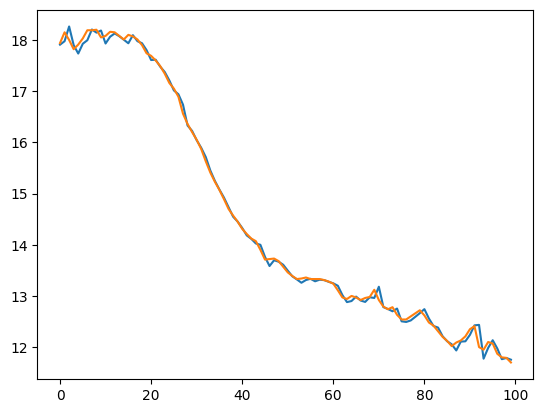

In [ ]:
import matplotlib.pyplot as plt
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actual'][:100])

In [ ]:
# 3. TESTING DATASET
test_predictions = model_1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actual':y_test})
test_results

1875/1875 [==============================] - 6s 3ms/step


,Test Predictions,Actual
0,15.137576,15.31
1,15.288984,15.30
2,15.242157,15.20
3,15.104958,14.86
4,14.653488,14.55
...,...,...
59995,-4.003570,-4.05
59996,-4.029277,-3.35
59997,-3.000871,-3.16
59998,-3.187635,-4.23


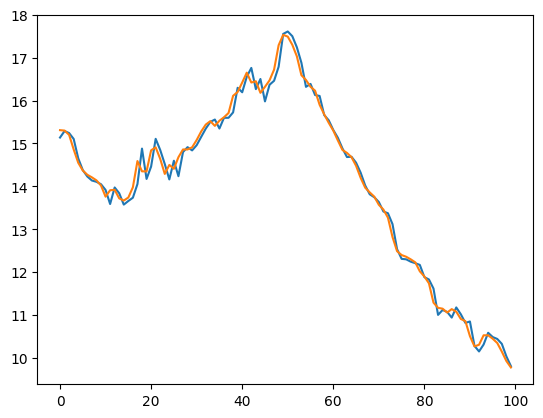

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actual'][:100])